In [2]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Percentiles ##

Definition: Let p be a number between 0 and 100. The pth percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values.

In [3]:
arr = make_array(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
# returns 2 because
#   2 is at least as large as 20% of the items in arr
#   2 is the smallest value for which this is true
percentile(20, arr)

2

In [6]:
# returns 3 because
#   3 is at least as large as 30% of the items in arr
#   3 is the smallest value for which this is true
percentile(30, arr)

3

In [7]:
# returns 3 because
#   3 is at least as large as 25% of the items in arr
#   3 is the smallest value for which this is true
percentile(25, arr)

3

## Discussion Question


In [ ]:
arr2 = make_array(1, 3, 5, 7, 9)

In [ ]:
# What will the following commands return?

In [12]:
# This is called the first quartile
percentile(25, arr2)

3

In [13]:
# This is called the second quartile,
# more commonly known as the median
percentile(50, arr2)

5

In [14]:
# This is called the third quartile
percentile(75, arr2)

7

## Inference: Estimation

 Below is a table of approx. 45,000 randomly sampled San Francisco employees.

In [3]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


In [4]:
# Filter out people working less than part time.

min_salary = 15 * 20 * 50 # $15/hr, 20 hr/wk, 50 weeks
sf = sf.where('Salary', are.above(min_salary))
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


### Population Distribution

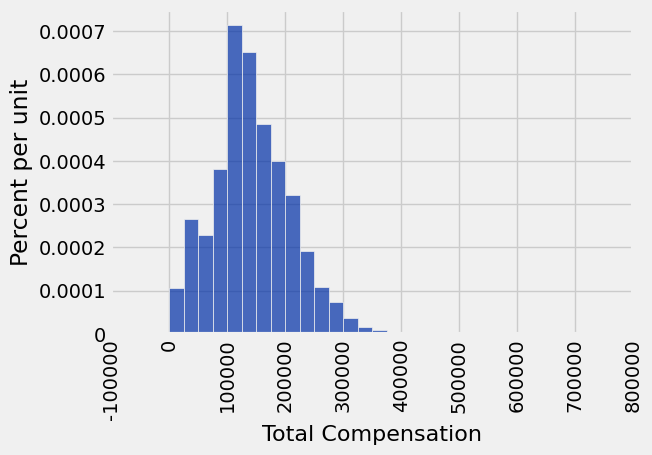

In [5]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

**Question:** What was the median salary in San Francisco in 2019?

In [18]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

That's the median of *our sample*. What is the median of the entire population?

# Bootstrap

In the bootstrap technique, we:
 - sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

Default behavior of `tbl.sample`: at random with replacement, the same number of times as rows of `tbl`

136353.0

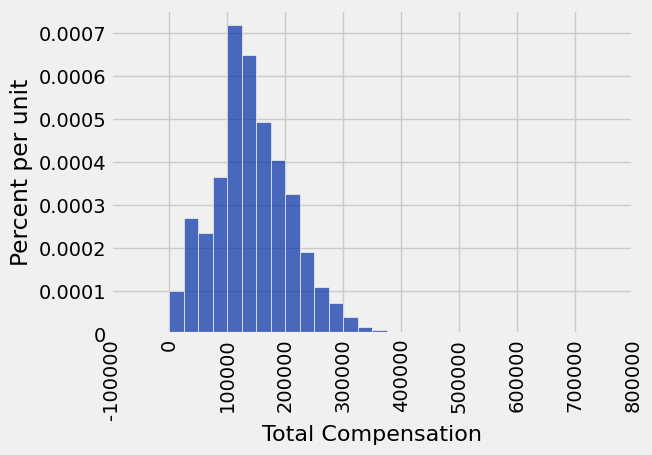

In [23]:
bootstrap_sample = sf.sample() # draw a new sample of the same size based on our data
bootstrap_sample.hist('Total Compensation', bins=sf_bins)
percentile(50, bootstrap_sample.column('Total Compensation')) # compute the median of the new sample

In [24]:
def one_bootstrap_median():
    bootstrap_sample = sf.sample()
    return percentile(50, bootstrap_sample.column('Total Compensation'))

In [30]:
one_bootstrap_median()

135906.0

In [ ]:
bootstrap_medians = make_array()
for i in np.arange(100):
        bootstrap_medians = np.append(bootstrap_medians, one_bootstrap_median())
bootstrap_medians

array([ 135589.,  135755.,  135782.,  136404.,  135921.,  135401.,
        135862.,  136522.,  135827.,  135837.,  135628.,  135350.,
        135434.,  136304.,  136735.,  135346.,  136018.,  135633.,
        135578.,  136335.,  135926.,  135678.,  135306.,  135771.,
        135577.,  135411.,  136309.,  135403.,  135288.,  136084.,
        136478.,  135955.,  136079.,  135601.,  135409.,  135283.,
        135796.,  135415.,  136026.,  136018.,  135267.,  135577.,
        136161.,  136084.,  135128.,  135695.,  135416.,  135755.,
        135513.,  136211.,  135695.,  136478.,  136353.,  135652.,
        135272.,  135633.,  135861.,  136589.,  135921.,  136081.,
        135188.,  135751.,  135585.,  135888.,  135603.,  135400.,
        135317.,  135380.,  135503.,  135613.,  135547.,  135492.,
        136314.,  135498.,  135596.,  136318.,  136472.,  135511.,
        135589.,  135826.,  135512.,  135336.,  136466.,  135880.,
        136077.,  135888.,  135624.,  136574.,  135008.,  1357

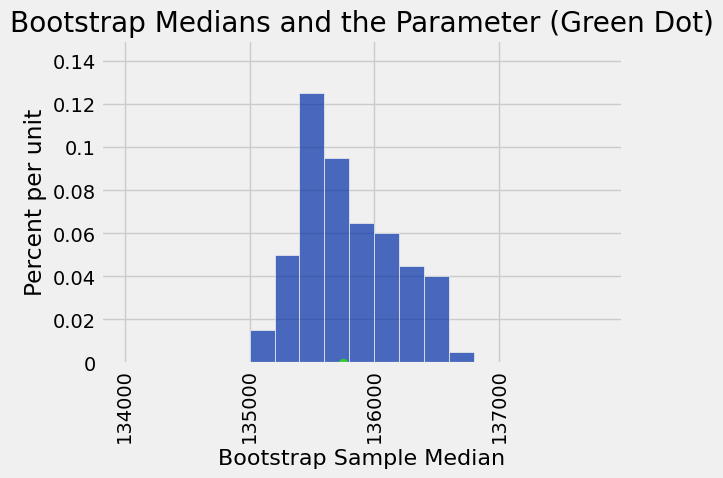

In [37]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_medians)

median_bins=np.arange(134000, 138000, 200)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.0015)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [38]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

make_array(left, right)

array([ 135188.,  136574.])

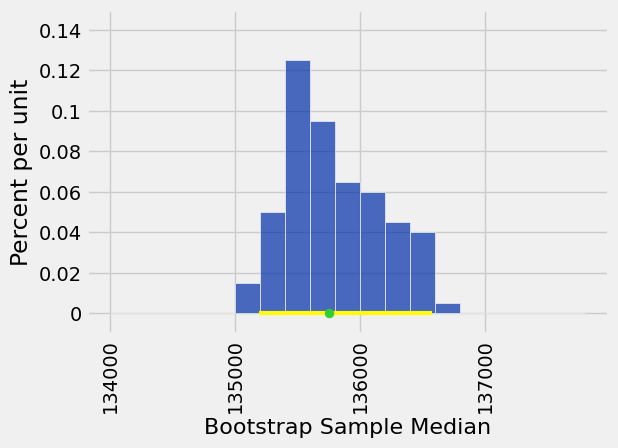

In [39]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.0001, 0.0015)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

This is called a **confidence interval**. In 95% of simulations, the median fell between these two values.

"We are 95% confident that the median salary of the entire population is between these two values."
